In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from AuctionAllocation import *
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap
import os
import numpy as np
import pickle

import sys
sys.path.append("/Users/keithwu/Documents/GitHub/auction-gym/src/c_utree_boost")

from c_utree_boost import Agent_boost_Galen_action_numpy as Agent
from c_utree_boost import Problem

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
estimator = "DR"
competition = "L"
agent_num = 3

# Normal Data

In [10]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS.json')

In [11]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/3 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  36%|███▋      | 5943/16384 [00:01<00:02, 4056.97it/s]
The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)


Stopping at Epoch 5943



DR 1: 100%|██████████| 32768/32768 [00:07<00:00, 4306.92it/s]


AUC predicting P(win):				 0.7532892421126735
Estimated Utility	 Mean Error:			 0.27180474110938635
Estimated Utility	 Mean Absolute Error:	 0.28295932365544885



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1235.98it/s]


Predicted mu Gammas:  tensor(0.9625, grad_fn=<MinBackward1>) tensor(1.0225, grad_fn=<MaxBackward1>) tensor(0.9999, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0486, grad_fn=<MinBackward1>) tensor(0.0601, grad_fn=<MaxBackward1>) tensor(0.0527, grad_fn=<MeanBackward0>)



DR 1:  13%|█▎        | 4296/32768 [00:05<00:39, 721.95it/s]


Stopping at Epoch 4296
DR 1 Number of samples:  torch.Size([6673, 2])
DR 1 Predicted Gammas:  0.67275053 0.80824536 0.73915756
agent: 1




DR 2:  29%|██▉       | 4770/16384 [00:01<00:03, 3035.71it/s]


Stopping at Epoch 4770



DR 2: 100%|██████████| 32768/32768 [00:07<00:00, 4241.59it/s]


AUC predicting P(win):				 0.8511500623460804
Estimated Utility	 Mean Error:			 0.6632797187249954
Estimated Utility	 Mean Absolute Error:	 0.6988038915049353



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1253.88it/s]


Predicted mu Gammas:  tensor(0.9548, grad_fn=<MinBackward1>) tensor(1.0119, grad_fn=<MaxBackward1>) tensor(0.9996, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0488, grad_fn=<MinBackward1>) tensor(0.0649, grad_fn=<MaxBackward1>) tensor(0.0521, grad_fn=<MeanBackward0>)



DR 2:   0%|          | 77/32768 [00:00<00:42, 764.35it/s]

Epoch 00118: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   1%|          | 233/32768 [00:00<00:41, 775.33it/s]

Epoch 00219: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 311/32768 [00:00<00:42, 755.46it/s]

Epoch 00320: reducing learning rate of group 0 to 5.6000e-05.



DR 2:   1%|▏         | 465/32768 [00:00<00:42, 760.01it/s]

Epoch 00421: reducing learning rate of group 0 to 1.1200e-05.


DR 2:   2%|▏         | 532/32768 [00:00<00:42, 760.68it/s]


Epoch 00522: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 532
DR 2 Number of samples:  torch.Size([6689, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:  25%|██▌       | 4107/16384 [00:01<00:03, 3400.99it/s]


Stopping at Epoch 4107



DR 3: 100%|██████████| 32768/32768 [00:07<00:00, 4151.88it/s]


AUC predicting P(win):				 0.9039420830087904
Estimated Utility	 Mean Error:			 0.6578898245422299
Estimated Utility	 Mean Absolute Error:	 0.7002041173267639



Initialising Policy: 100%|██████████| 16384/16384 [00:12<00:00, 1266.42it/s]


Predicted mu Gammas:  tensor(0.9770, grad_fn=<MinBackward1>) tensor(1.0107, grad_fn=<MaxBackward1>) tensor(0.9991, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0461, grad_fn=<MinBackward1>) tensor(0.0681, grad_fn=<MaxBackward1>) tensor(0.0523, grad_fn=<MeanBackward0>)



DR 3:   0%|          | 77/32768 [00:00<00:42, 769.38it/s]

Epoch 00121: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 233/32768 [00:00<00:42, 770.49it/s]

Epoch 00222: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 311/32768 [00:00<00:42, 766.27it/s]

Epoch 00323: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   1%|▏         | 467/32768 [00:00<00:41, 773.39it/s]

Epoch 00424: reducing learning rate of group 0 to 1.1200e-05.


DR 3:   2%|▏         | 534/32768 [00:00<00:41, 767.93it/s]


Epoch 00525: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 534
DR 3 Number of samples:  torch.Size([6638, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
number of iteration: 1

agent: 0




DR 1:   7%|▋         | 1164/16384 [00:00<00:03, 4126.12it/s][A


Stopping at Epoch 1164
AUC predicting P(win):				 0.7761463900766078
Estimated Utility	 Mean Error:			 -0.01939636451623573
Estimated Utility	 Mean Absolute Error:	 0.1302664795570122



DR 1:  35%|███▌      | 11573/32768 [00:02<00:05, 4232.82it/s]

Epoch 10906: reducing learning rate of group 0 to 6.0000e-04.
Epoch 11172: reducing learning rate of group 0 to 1.2000e-04.
Epoch 11429: reducing learning rate of group 0 to 2.4000e-05.
Epoch 11686: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  38%|███▊      | 12354/32768 [00:03<00:04, 4110.30it/s]


Epoch 11943: reducing learning rate of group 0 to 9.6000e-07.
Epoch 12200: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 12354
AUC predicting P(win):				 0.7712611348654909
Estimated Utility	 Mean Error:			 0.015358471970044496
Estimated Utility	 Mean Absolute Error:	 0.14324541495949636



DR 1:   4%|▎         | 1173/32768 [00:01<00:40, 775.00it/s]


Stopping at Epoch 1173
DR 1 Number of samples:  torch.Size([6671, 2])
DR 1 Predicted Gammas:  0.6922485 0.8299177 0.76086164
agent: 1




DR 2:  26%|██▌       | 4297/16384 [00:01<00:03, 3117.14it/s]


Stopping at Epoch 4297
AUC predicting P(win):				 0.7812100643768243
Estimated Utility	 Mean Error:			 0.21328093051361977
Estimated Utility	 Mean Absolute Error:	 0.35921421272423604



DR 2:  29%|██▉       | 9612/32768 [00:02<00:05, 4024.32it/s]

Epoch 09105: reducing learning rate of group 0 to 6.0000e-04.
Epoch 09433: reducing learning rate of group 0 to 1.2000e-04.
Epoch 09690: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  32%|███▏      | 10421/32768 [00:02<00:05, 4027.50it/s]

Epoch 09947: reducing learning rate of group 0 to 4.8000e-06.
Epoch 10204: reducing learning rate of group 0 to 9.6000e-07.
Epoch 10461: reducing learning rate of group 0 to 1.9200e-07.
Epoch 10718: reducing learning rate of group 0 to 1.0000e-07.



DR 2:  33%|███▎      | 10937/32768 [00:02<00:05, 4116.07it/s]


Stopping at Epoch 10937
AUC predicting P(win):				 0.7775945659562558
Estimated Utility	 Mean Error:			 0.21328093051361977
Estimated Utility	 Mean Absolute Error:	 0.35921421272423604



DR 2:   0%|          | 70/32768 [00:00<00:47, 693.85it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   1%|          | 216/32768 [00:00<00:45, 717.17it/s]

Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 288/32768 [00:00<00:45, 712.39it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.



DR 2:   1%|▏         | 432/32768 [00:00<00:47, 683.12it/s]

Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 508/32768 [00:00<00:45, 704.79it/s]

Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.



DR 2:   2%|▏         | 584/32768 [00:00<00:44, 719.74it/s]

Epoch 00607: reducing learning rate of group 0 to 4.4800e-07.



DR 2:   2%|▏         | 745/32768 [00:01<00:44, 720.58it/s]


Epoch 00708: reducing learning rate of group 0 to 8.9600e-08.
Stopping at Epoch 745
DR 2 Number of samples:  torch.Size([6721, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:   7%|▋         | 1106/16384 [00:00<00:04, 3397.04it/s]


Stopping at Epoch 1106
AUC predicting P(win):				 0.7607385613204819
Estimated Utility	 Mean Error:			 0.07364444187338268
Estimated Utility	 Mean Absolute Error:	 0.27521953931469256



DR 3:  79%|███████▉  | 25837/32768 [00:06<00:01, 3983.33it/s]

Epoch 25301: reducing learning rate of group 0 to 6.0000e-04.
Epoch 25615: reducing learning rate of group 0 to 1.2000e-04.
Epoch 25872: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  82%|████████▏ | 26862/32768 [00:06<00:01, 4177.64it/s]


Epoch 26129: reducing learning rate of group 0 to 4.8000e-06.
Epoch 26386: reducing learning rate of group 0 to 9.6000e-07.
Epoch 26643: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 26862
AUC predicting P(win):				 0.7816712349679756
Estimated Utility	 Mean Error:			 0.07364444187338268
Estimated Utility	 Mean Absolute Error:	 0.27521953931469256



DR 3:  32%|███▏      | 10414/32768 [00:13<00:29, 754.69it/s]


Stopping at Epoch 10414
DR 3 Number of samples:  torch.Size([6608, 2])
DR 3 Predicted Gammas:  0.9625505 1.0 0.99951166
number of iteration: 2

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4042.77it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8357459658256602
Estimated Utility	 Mean Error:			 -0.007525734913022736
Estimated Utility	 Mean Absolute Error:	 0.18485812099734475



DR 1:  16%|█▋        | 5358/32768 [00:01<00:06, 3975.71it/s]

Epoch 04707: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04992: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05249: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  19%|█▊        | 6130/32768 [00:01<00:06, 4039.35it/s]


Epoch 05506: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05763: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06020: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 6130
AUC predicting P(win):				 0.8398283427055105
Estimated Utility	 Mean Error:			 0.0025301185075967164
Estimated Utility	 Mean Absolute Error:	 0.1847167471338455



DR 1:   7%|▋         | 2140/32768 [00:02<00:41, 742.45it/s]


Stopping at Epoch 2140
DR 1 Number of samples:  torch.Size([6657, 2])
DR 1 Predicted Gammas:  0.69739825 0.87906253 0.79236436
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3557.04it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7683439457844413
Estimated Utility	 Mean Error:			 -0.00394276607257108
Estimated Utility	 Mean Absolute Error:	 0.2710899944456779



DR 2:  15%|█▌        | 5008/32768 [00:01<00:06, 4154.20it/s]

Epoch 04265: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04570: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04827: reducing learning rate of group 0 to 2.4000e-05.
Epoch 05084: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  18%|█▊        | 5883/32768 [00:01<00:06, 4148.19it/s]


Epoch 05341: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05598: reducing learning rate of group 0 to 1.9200e-07.
Epoch 05855: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 5883
AUC predicting P(win):				 0.7670295410575185
Estimated Utility	 Mean Error:			 -0.00394276607257108
Estimated Utility	 Mean Absolute Error:	 0.2710899944456779



DR 2:   1%|          | 298/32768 [00:00<00:44, 728.09it/s]

Epoch 00220: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00321: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   2%|▏         | 516/32768 [00:00<00:45, 715.42it/s]

Epoch 00422: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00523: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 631/32768 [00:00<00:44, 719.18it/s]


Epoch 00624: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 631
DR 2 Number of samples:  torch.Size([6607, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2930.06it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7944163113006397
Estimated Utility	 Mean Error:			 0.0018693009372788586
Estimated Utility	 Mean Absolute Error:	 0.3216933086238414



DR 3:   6%|▌         | 1986/32768 [00:00<00:08, 3808.80it/s]

Epoch 01348: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01605: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01862: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   8%|▊         | 2594/32768 [00:00<00:07, 3875.58it/s]


Epoch 02119: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02376: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2594
AUC predicting P(win):				 0.7960906989353673
Estimated Utility	 Mean Error:			 0.0018691740298025388
Estimated Utility	 Mean Absolute Error:	 0.32169318171636513



DR 3:   1%|          | 219/32768 [00:00<00:46, 707.18it/s]

Epoch 00104: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00205: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|▏         | 445/32768 [00:00<00:43, 743.47it/s]

Epoch 00306: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00407: reducing learning rate of group 0 to 1.1200e-05.


DR 3:   2%|▏         | 515/32768 [00:00<00:44, 724.42it/s]


Epoch 00508: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 515
DR 3 Number of samples:  torch.Size([6736, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0


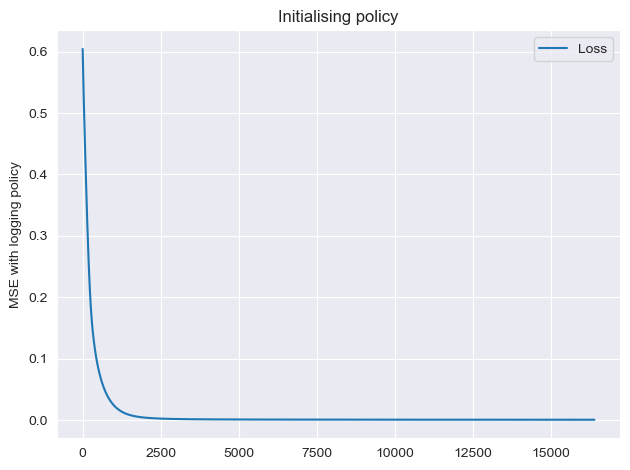

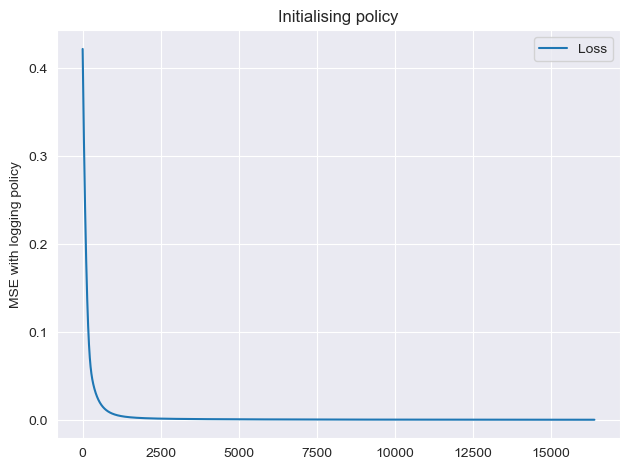

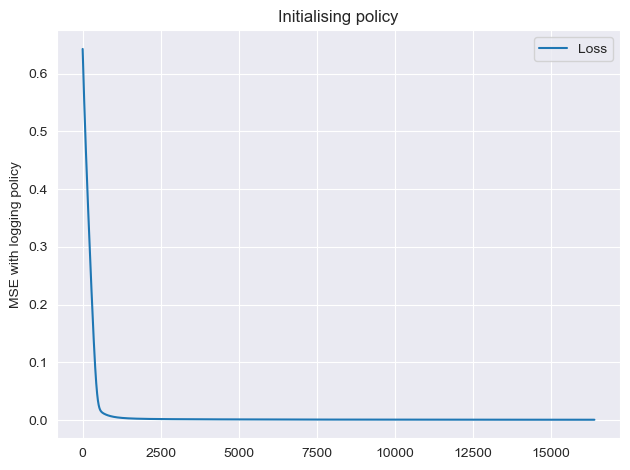

In [12]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

# Save Auction

In [38]:
pickle.dump(auction, open('DR_L_auction.pickle', 'wb'))

# Read Auction

In [3]:
auction = pickle.load(open('DR_L_auction.pickle', 'rb'))

# Data generation

In [41]:
# data generation
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplus
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'val': {}, 'test':{}}


num_data = [80000, 10000, 10000]

for i, data_set in enumerate(offline_data.keys()):
    for _ in range(num_data[i]):
        auction.simulate_opportunity()
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        offline_data[data_set][agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

# Save Data

In [42]:
data_dir = f"../data_{estimator}_{competition}/"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        np.savetxt(f'{data_dir}{data_set}_{agent_id}.csv', offline_data[data_set][agent_id])

In [9]:
# import split_data
# import importlib
# importlib.reload(split_data)
from split_data import split_data

In [10]:
# split_data
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        split_data(estimator=estimator, competition=competition, data_set=data_set, agent_num=str(agent_id), row_num=1000, data_dir=f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}/')

# Read data

In [3]:
offline_data_key = {'context': 0, 'estimated_CTR': 5, 'value': 6, 'bid': 7, 'gamma': 8, 'true_CTR': 9, 'price': 10, 'second_price': 11, 'won_mask': 12, 'outcome': 13, 'utility': 14}

In [4]:
def read_csv_game_record_auction(csv_dir):
    data = np.genfromtxt(csv_dir, delimiter=' ')
    return data

In [5]:
offline_data = {'train': {}, 'val': {},'test': {}}
for agent_id in range(agent_num):
    offline_data['train'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}/train_{agent_id}.csv")
    offline_data['val'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}/val_{agent_id}.csv")
    offline_data['test'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}/test_{agent_id}.csv")

# CUTree

In [50]:
problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=2, split_size=1000,games_directory="../data_DR_H_split_1000/train/")

# disable the max_hist
CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=3000, training_mode='')

max_hist 3000


In [8]:
#for agent_id in offline_data['train'].keys():
agent_id = 0
for max_depth in [5, 10, 20, 30]:
    for min_split_int in [2, 4, 10, 15]:
        problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000,games_directory="../data_DR_L_split_1000/train/")

        CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000, training_mode='')
        print("Agent", agent_id)
        print("Max Depth", max_depth)
        print("Min Split Instances", min_split_int)
        input_train_data = offline_data['train'][agent_id][:, :5]
        label_train_data = offline_data['train'][agent_id][:, 7]

        input_val_data = offline_data['val'][agent_id][:, :5]
        label_val_data = offline_data['val'][agent_id][:, 7]

        train_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}/', read_game_number=54, data_set='train')
        val_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}/', read_game_number=54, data_set='val')
        print("Train R2 score:", r2_score(label_train_data, train_preds))
        print("Val R2 score:", r2_score(label_val_data, val_preds))
        print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
        print("Val MSE: ", mean_squared_error(label_val_data, val_preds))

Agent 0
Max Depth 5
Min Split Instances 2
<ipykernel.iostream.OutStream object at 0x107967b50> starting from 54
<ipykernel.iostream.OutStream object at 0x107967b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x107967b50> starting from 54
<ipykernel.iostream.OutStream object at 0x107967b50> finishing read tree
Train R2 score: 0.6094718209238534
Val R2 score: 0.6063320574811151
Train MSE:  0.030696126603756882
Val MSE:  0.03160818129066269
Agent 0
Max Depth 5
Min Split Instances 4
<ipykernel.iostream.OutStream object at 0x107967b50> starting from 54
<ipykernel.iostream.OutStream object at 0x107967b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x107967b50> starting from 54
<ipykernel.iostream.OutStream object at 0x107967b50> finishing read tree
Train R2 score: 0.609579824289559
Val R2 score: 0.6063201929111421
Train MSE:  0.030687637370034555
Val MSE:  0.031609133914532045
Agent 0
Max Depth 5
Min Split Instances 10
<ipykernel.iostream.OutStream object at

# M5 Tree

In [23]:
from m5py import M5Prime, export_text_m5

In [8]:
# model = M5Prime(use_smoothing=True, use_pruning=False)
# for agent_id in offline_data['train'].keys():
#     input_train_data = offline_data['train'][agent_id][:, :5]
#     label_train_data = offline_data['train'][agent_id][:, 7]
#     print("Agent", agent_id)
#     best_estimator = model.fit(input_train_data, label_train_data)
#     input_test_data = offline_data['test'][agent_id][:, :5]
#     label_test_data = offline_data['test'][agent_id][:, 7]
#
#     train_preds = best_estimator.predict(input_train_data)
#     test_preds = best_estimator.predict(input_test_data)
#     print("Train R2 score:", r2_score(label_train_data, train_preds))
#     print("Test R2 score:", r2_score(label_test_data, test_preds))
#     print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
#     print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

In [6]:
param_grid = {
    'max_depth': [ 10, 20, 35, 50 ]
}

In [7]:
def gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data):
    best_params_ = None
    best_score_ = -100
    for max_depth in param_grid['max_depth']:
        #for min_samples_split in param_grid['min_samples_split']:
        model = model_class(max_depth= max_depth, random_state=0)
        model.fit(input_train_data, label_train_data)
        score = model.score(input_val_data, label_val_data)
        if score > best_score_:
            best_params_ = {'max_depth': max_depth}
            best_score_ = score


    print("Param for GS", best_params_)
    print("R2 score for GS", best_score_)
    best_model = model_class(**best_params_)
    return best_model

In [24]:
model_class = M5Prime
# without smoothing
context_bid_estimators_M5Tree = {}
# context with bid
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    input_val_data = offline_data['val'][agent_id][:, :5]
    label_val_data = offline_data['val'][agent_id][:, 7]
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_M5Tree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 35}
R2 score for GS 0.9705930729883634
Test R2 score: 0.9703142217824764
Train MSE:  0.0017459331271468409
Test MSE:  0.0023560391110562556
Agent 1
Param for GS {'max_depth': 35}
R2 score for GS 0.85247994268845
Test R2 score: 0.8504057045276651
Train MSE:  0.0029464233562282427
Test MSE:  0.004418607358783486
Agent 2
Param for GS {'max_depth': 35}
R2 score for GS 0.9140513550224263
Test R2 score: 0.9193135159505365
Train MSE:  0.003690009663184704
Test MSE:  0.00563234819807598


In [8]:
# context with bid
model_class = tree.DecisionTreeRegressor
context_bid_estimators_rTree = {}
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    input_val_data = offline_data['val'][agent_id][:, :5]
    label_val_data = offline_data['val'][agent_id][:, 7]
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_rTree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 35}
R2 score for GS 0.9320580281969516
Test R2 score: 0.9314326178747057
Train MSE:  9.806551482913015e-07
Test MSE:  0.00544191339186692
Agent 1
Param for GS {'max_depth': 10}
R2 score for GS 0.7351039977316521
Test R2 score: 0.7429674014954095
Train MSE:  0.005355886384553947
Test MSE:  0.007592041712644444
Agent 2
Param for GS {'max_depth': 10}
R2 score for GS 0.8636026958556579
Test R2 score: 0.8668136265304347
Train MSE:  0.005944670702279289
Test MSE:  0.00929712131414367


# Check Bid value std

In [27]:
offline_data['train'][2][:, 7].std()

0.2587533890799266

In [42]:
# M5Tree
model_class = M5Prime
context_bid_estimators_M5Tree = {}
best_params = {0: 35, 1: 35, 2: 35}
for agent_id in offline_data['train'].keys():
    best_estimator = model_class(max_depth= best_params[agent_id], random_state=0)
    best_estimator.fit(offline_data['train'][agent_id][:, :5], offline_data['train'][agent_id][:, 7])
    context_bid_estimators_M5Tree[agent_id] = best_estimator

# RTree
model_class = tree.DecisionTreeRegressor
context_bid_estimators_rTree = {}
best_params = {0: 35, 1: 10, 2: 10}
for agent_id in offline_data['train'].keys():
    best_estimator = model_class(max_depth= best_params[agent_id], random_state=0)
    best_estimator.fit(offline_data['train'][agent_id][:, :5], offline_data['train'][agent_id][:, 7])
    context_bid_estimators_rTree[agent_id] = best_estimator

In [10]:
# If the rng record is cleared, use this
rng = np.random.default_rng(0)

In [43]:
# This is for single agent get replaced by surrogate model
for agent_id in offline_data['train'].keys():
    surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
    data_set = 'test'
    surrogate_agent_id = agent_id
    surrogate_bid = context_bid_estimators_M5Tree[surrogate_agent_id].predict(offline_data[data_set][surrogate_agent_id][:, :5])
    context_num = 5
    for i in range(len(offline_data[data_set][surrogate_agent_id])):
        # win_mask
        if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                surrogate_logs['won_mask'].append(True)
                surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
        else:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                surrogate_logs['won_mask'].append(True)
                # This creates randomness in the surrogate model
                outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                surrogate_logs['outcomes'].append(outcome)
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

    surrogate_won_mask = np.array(surrogate_logs['won_mask'])
    surrogate_outcomes = np.array(surrogate_logs['outcomes'])
    surrogate_prices = np.array(surrogate_logs['prices'])
    surrogate_utilities = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
    surrogate_utilities[surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
    print(f"Agent: {agent_id}")
    print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
    print(f"Surrogate utility: {surrogate_utilities.mean()}" )
    print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities)}")

Agent: 0
Original utility: -0.030198996479251155
Surrogate utility: -0.025231174213523094
R2 score: 0.9417208559902971
Agent: 1
Original utility: 0.03940024821889912
Surrogate utility: 0.037856759926723244
R2 score: 0.9215939356195453
Agent: 2
Original utility: 0.012617162482575904
Surrogate utility: 0.014044985428814093
R2 score: 0.9230362181646108


<AxesSubplot:>

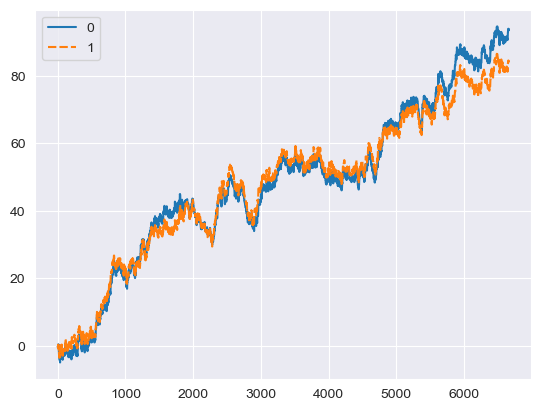

In [44]:
sns.lineplot(data=[surrogate_utilities.cumsum(), offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].cumsum()])

# SHAP

In [316]:
# naturally, the constant/ bias term in context doesnt have any effect on the prediction

In [67]:
background = {}
explainer_rTree_treeSHAP = {}
shap_values_rTree_treeSHAP = {}
explainer_rTree = {}
shap_values_rTree = {}
explainer_m5Tree  = {}
shap_values_m5Tree = {}

for agent_id in range(3):
    background[agent_id] = shap.kmeans(offline_data['train'][agent_id][:, :5], 10)
    explainer_rTree_treeSHAP[agent_id] = shap.TreeExplainer(context_bid_estimators_rTree[agent_id])
    shap_values_rTree_treeSHAP[agent_id] = explainer_rTree_treeSHAP[agent_id].shap_values(offline_data['test'][agent_id][:, :5])
    explainer_rTree[agent_id] = shap.KernelExplainer(context_bid_estimators_rTree[agent_id].predict, background[agent_id])
    shap_values_rTree[agent_id] = explainer_rTree[agent_id].shap_values(offline_data['test'][agent_id][:, :5])
    explainer_m5Tree[agent_id] = shap.KernelExplainer(context_bid_estimators_M5Tree[agent_id].predict, background[agent_id])
    shap_values_m5Tree[agent_id] = explainer_m5Tree[agent_id].shap_values(offline_data['test'][agent_id][:, :5])

  0%|          | 0/6684 [00:00<?, ?it/s]

  0%|          | 0/6684 [00:00<?, ?it/s]

  0%|          | 0/6657 [00:00<?, ?it/s]

  0%|          | 0/6657 [00:00<?, ?it/s]

  0%|          | 0/6659 [00:00<?, ?it/s]

  0%|          | 0/6659 [00:00<?, ?it/s]

In [317]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], offline_data['test'][0][:200, :5])

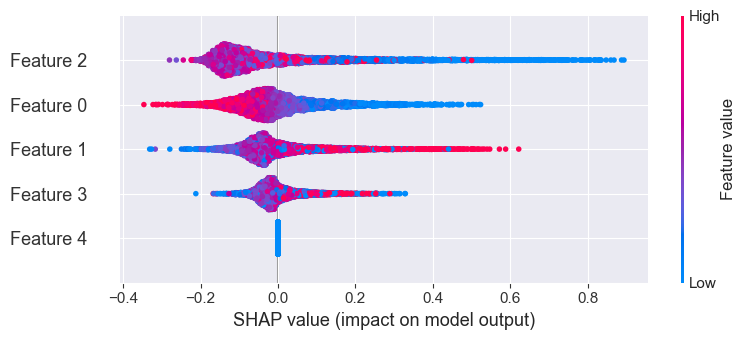

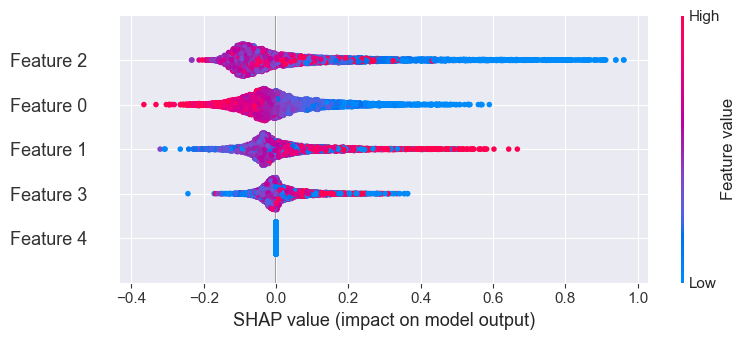

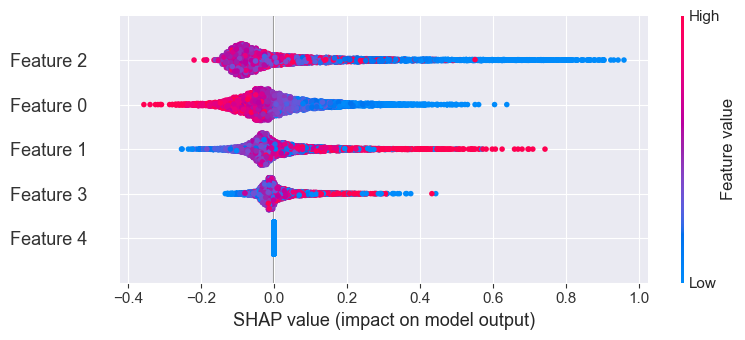

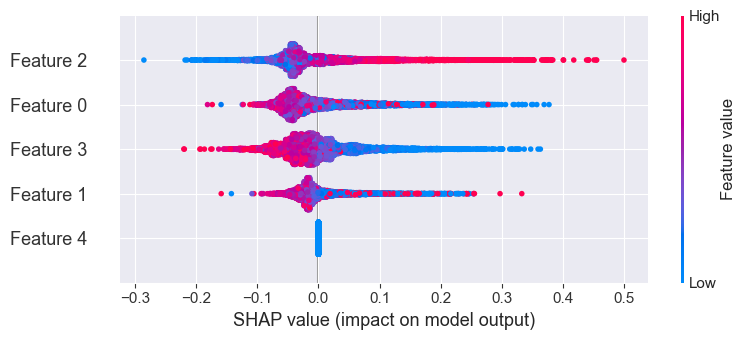

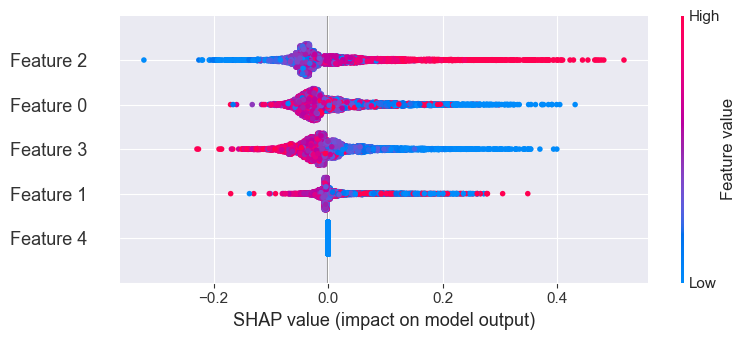

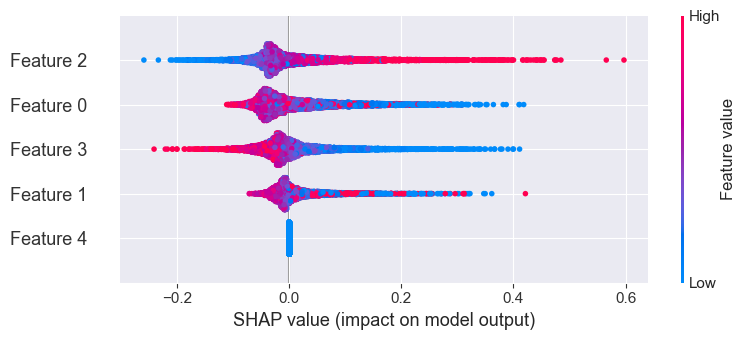

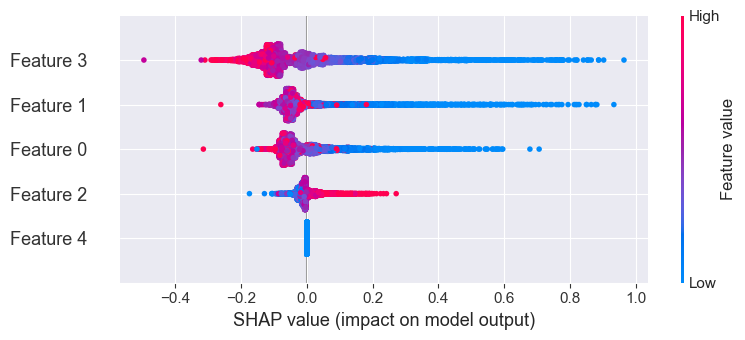

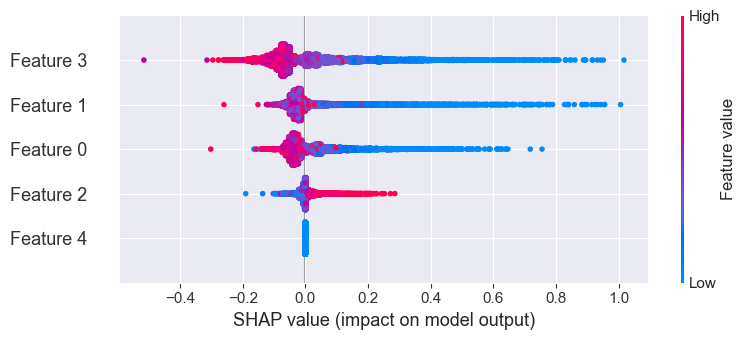

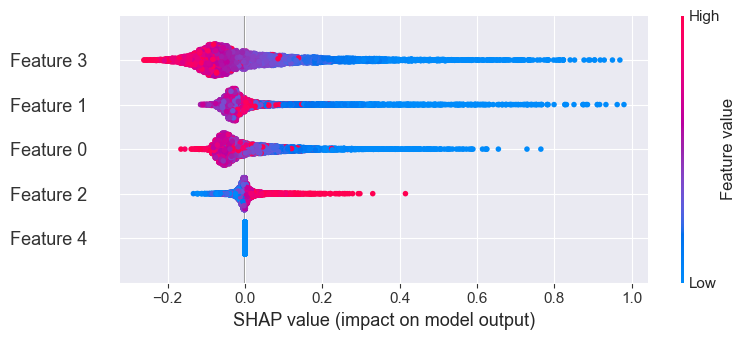

In [70]:
for agent_id in range(3):
    shap.summary_plot(shap_values_rTree_treeSHAP[agent_id], offline_data['test'][agent_id][:, :5])
    shap.summary_plot(shap_values_rTree[agent_id], offline_data['test'][agent_id][:, :5])
    shap.summary_plot(shap_values_m5Tree[agent_id], offline_data['test'][agent_id][:, :5])

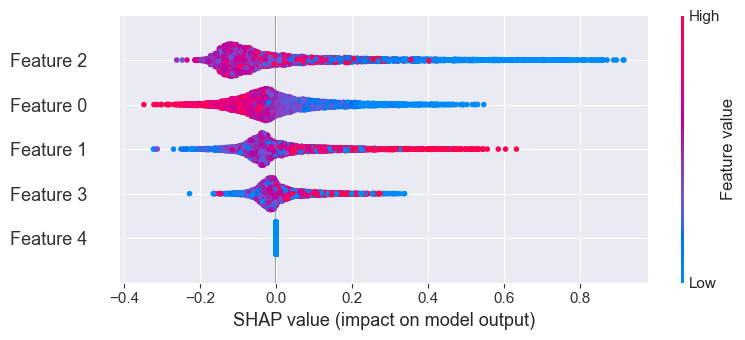

In [65]:
shap.summary_plot(shap_values_rTree_agent0, offline_data['test'][0][:, :5])

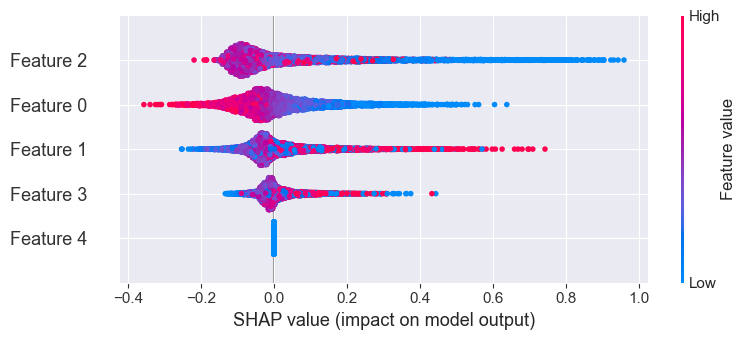

In [59]:
shap.summary_plot(shap_values, offline_data['test'][0][:, :5])

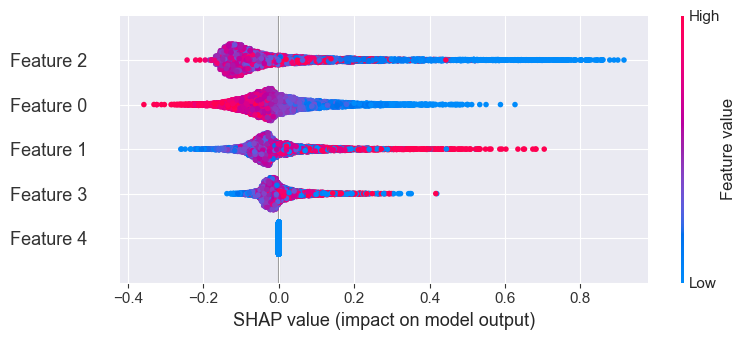

In [62]:
shap.summary_plot(shap_values_m5Tree_agent0, offline_data['test'][0][:, :5])

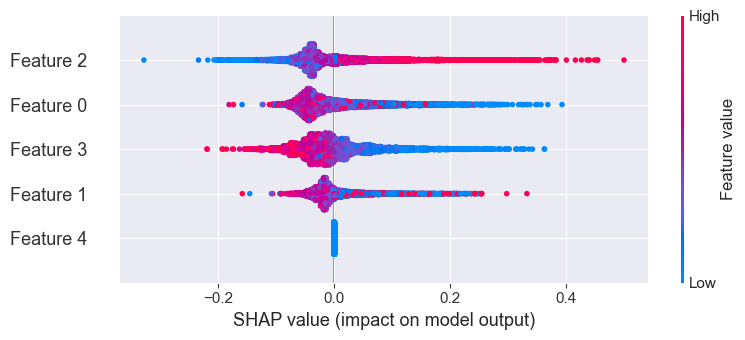

In [30]:
shap.summary_plot(shap_values_rTree_agent1, offline_data['test'][1][:, :5])

In [ ]:
shap.summary_plot(shap_values, offline_data['test'][0][:, :5])

In [207]:
# # This is for single agent get replaced by surrogate model
#
# surrogate_model = None
# data_set = 'test'
# surrogate_agent_id = 0
# surrogate_bid = test_preds
# j = 0
# for i in range(len(participating_agents_logs[data_set])):
#     bids = []
#     CTRs = []
#     if surrogate_agent_id in participating_agents_logs[data_set][i]:
#         for agent_id in offline_data[data_set].keys():
#             if agent_id == surrogate_agent_id:
#                 bids.append(test_preds[j])
#                 j+=1
#             else:
#                 bids.append(offline_data[data_set][agent_id][j, 7])
#             CTRs.append(offline_data[data_set][agent_id][j, 9])
#         bids = np.array(bids)
#         CTRs = np.array(CTRs)
#         winners = np.argsort(-bids)[:1]
#         outcomes = rng.binomial(1, CTRs[winners])
#         # currently only consider one winner
#         if surrogate_agent_id == winners:
#             surrogate_logs['outcomes'].append(outcomes)
#             surrogate_logs['won_mask'].append(1)
#         else:
#             surrogate_logs['outcomes'].append(0)
#             surrogate_logs['won_mask'].append(0)
#         surrogate_logs['prices'].append(bids[winners])
#     else:
#         pass

In [83]:
# context with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.7276250965125122
Test R2 score: 0.7416675628006455
Train MSE:  0.00022022459909153483
Test MSE:  0.00027168110604471903
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.4048234159067919
Test R2 score: 0.39205196499514683
Train MSE:  0.00013023620239745016
Test MSE:  0.0001698578591254831
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [210]:
# estimated_CTR and value with bid
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV score for GS 0.9994057387395154
Test R2 score: 0.9993624406666591
Train MSE:  2.1039844916142337e-05
Test MSE:  3.602544011977278e-05
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.9999547836211953
Test R2 score: 0.9999626617457903
Train MSE:  4.217735241951066e-07
Test MSE:  2.1888072122472528e-06
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV score for GS 0.9993136801654782
Test R2 score: 0.9993091525895826
Train MSE:  2.3764045696378117e-05
Test MSE:  2.8988811842495896e-05


In [85]:
# estimated_CTR and value with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.9069516511333034
Test R2 score: 0.9079438564449289
Train MSE:  9.46583991692418e-05
Test MSE:  9.681290963841697e-05
Agent 1
Param for GS {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.6273128939537818
Test R2 score: 0.6142501426573515
Train MSE:  9.935543498714107e-05
Test MSE:  0.00010777671964292107
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [237]:
x = context_bid_estimators[0]

In [223]:
x([2, 3])

TypeError: 'DecisionTreeRegressor' object is not callable

In [240]:
float(x.predict(np.array([1, 2, 3, 2, 3]).reshape(-1, 5)))

0.7775402386708143

In [241]:
len(np.array([1, 2, 3, 2, 3]))

5

In [243]:
np.argmax(np.array([1, 2, 3, 2, 3]))

2